In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("EncodedSalesListing.csv")

train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Days on Market')
test_labels = test_features.pop('Days on Market')


In [ ]:
model = Sequential([
      layers.Dense(33, activation='relu'),
      layers.Dense(66, activation='relu'),
      layers.Dense(18, activation='relu'),
      layers.Dense(1)
  ])

model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
history = model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

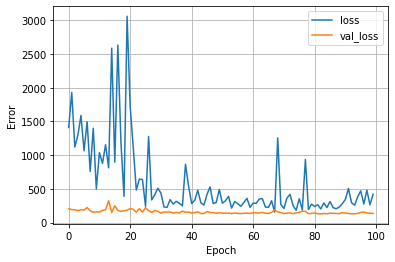

In [ ]:
plot_loss(history)


In [ ]:
# Test Results

test_results = model.evaluate(
    test_features,
    test_labels, verbose=0)
print(test_results)

137.64413452148438
